In [1]:
#Portfolio Project - Customer Personality Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from datetime import date
pd.set_option("display.max_columns", 50)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,normalize
from mlxtend.frequent_patterns import fpgrowth, apriori
from mlxtend.frequent_patterns import association_rules
#%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
customers = pd.read_csv('marketing_campaign.csv', sep = '\t') 


customers['Age'] = 2015 - customers['Year_Birth']
customers['Children'] = customers['Kidhome']+customers['Teenhome']
customers['HasChild'] = customers.Children.apply(lambda x: 1 if x>0 else 0)
customers['Spending'] = customers['MntWines']+customers['MntFruits']+customers['MntMeatProducts']+customers['MntFishProducts']+customers['MntSweetProducts']+customers['MntGoldProds']
last_date = date(2015,10,19)
customers 
customers['Seniority']=pd.to_datetime(customers['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
customers['Seniority'] = pd.to_numeric(customers['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
customers = customers[(customers['Income'] > 18000) & (customers['Income']  < 90000)]


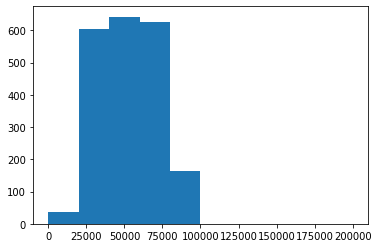

In [4]:
plt.hist(customers.Income,range=[0, 200000])
plt.show()

<function matplotlib.pyplot.clf()>

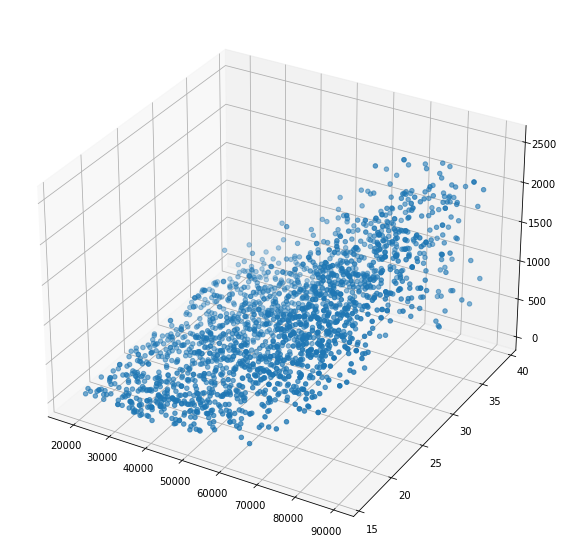

In [5]:
data = customers[['Income', 'Seniority' , 'Spending']]
#print(features)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
A = normalize(scaled_data)
x = data['Income']
y = data['Seniority']
z = data['Spending']

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(projection='3d')
ax.scatter(x,y,z)
plt.clf


In [6]:

model = KMeans(n_clusters = 4, init = 'k-means++')
model.fit(A)



KMeans(n_clusters=4)

In [7]:
labels = model.predict(A)
data['Groups'] = labels.copy()
data = data.replace({3: "H$HSLY",2:"L$LSLY",0:"H$HSHY",1:"L$LSHY"})
print(data)

       Income  Seniority  Spending  Groups
0     58138.0  38.000000      1617  L$LSHY
1     46344.0  19.666667        27  H$HSLY
2     71613.0  26.300000       776  H$HSHY
3     26646.0  20.533333        53  H$HSLY
4     58293.0  21.266667       422  H$HSHY
...       ...        ...       ...     ...
2235  61223.0  28.600000      1341  L$LSHY
2236  64014.0  16.533333       444  H$HSHY
2237  56981.0  21.066667      1241  H$HSHY
2238  69245.0  21.100000       843  H$HSHY
2239  52869.0  36.633333       172  L$LSLY

[2072 rows x 4 columns]


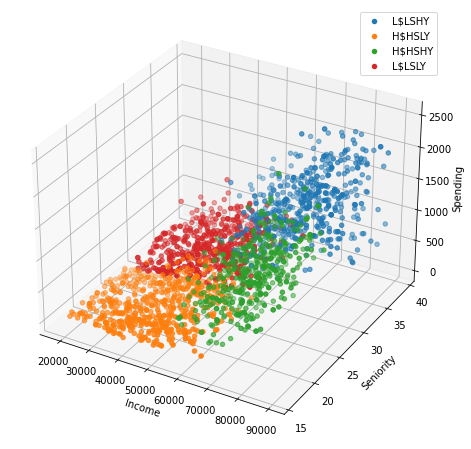

<function matplotlib.pyplot.clf()>

In [8]:
plt.clf
fig1 = plt.figure(figsize = (8,8))
ax1 = plt.subplot(projection='3d')
for val in list(data.Groups.unique()):
    x = data[data.Groups == val]['Income']
    y = data[data.Groups == val]['Seniority']
    z = data[data.Groups == val]['Spending']
    ax1.scatter(x,y,z, label = val)
                
                               
    
ax1.set_xlabel("Income")
ax1.set_ylabel("Seniority")
ax1.set_zlabel("Spending")
#ax1.legend(["H$HSHY","L$LSLY","H$HSLY","L$LSHY"])
ax1.legend()
    

plt.show()
plt.clf

In [9]:
customers = customers[['Age','Education','Marital_Status','Income','Spending','Seniority','HasChild','Children','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
customers['Clusters'] = data['Groups'].copy()
cut_labels = ['Low_buyer','Usual_buyer', 'Best_buyer']
age_labels = ['Young', 'Adult', 'Mature', 'Senior']
income_labels = ['Low income', 'Low-medium income', 'Medium-high income', 'High income']
seniority_labels = ['Newcommer','Explorer', 'Regular','Oldie']
customers['wine_cat'] = pd.cut(customers['MntWines'], bins = np.linspace(customers['MntWines'][customers['MntWines']>0].min(),customers['MntWines'].max(),4), labels = cut_labels ).astype(object)
customers['fruit_cat'] = pd.cut(customers['MntFruits'], bins = np.linspace(customers['MntFruits'][customers['MntFruits']>0].min(),customers['MntFruits'].max(),4), labels = cut_labels ).astype(object)
customers['meat_cat'] = pd.cut(customers['MntMeatProducts'], bins = np.linspace(customers['MntMeatProducts'][customers['MntMeatProducts']>0].min(),customers['MntMeatProducts'].max(),4), labels = cut_labels ).astype(object)
customers['fish_cat'] = pd.cut(customers['MntFishProducts'], bins = np.linspace(customers['MntFishProducts'][customers['MntFishProducts']>0].min(),customers['MntFishProducts'].max(),4), labels = cut_labels ).astype(object)
customers['sweets_cat'] = pd.cut(customers['MntSweetProducts'], bins = np.linspace(customers['MntSweetProducts'][customers['MntSweetProducts']>0].min(),customers['MntSweetProducts'].max(),4), labels = cut_labels ).astype(object)
customers['gold_cat'] = pd.cut(customers['MntGoldProds'], bins = np.linspace(customers['MntGoldProds'][customers['MntGoldProds']>0].min(),customers['MntGoldProds'].max(),4), labels = cut_labels ).astype(object)

customers['Marital_Status']=customers['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
customers['Education']=customers['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})
customers['Age_Groups'] = pd.cut(customers['Age'], bins = np.linspace(customers['Age'][customers['Age']>0].min(),customers['Age'].max(),5), labels = age_labels ).astype(object)
customers['Income_Groups'] = pd.cut(customers['Income'], bins = np.linspace(customers['Income'][customers['Income']>0].min(),customers['Income'].max(),5), labels = income_labels ).astype(object)
customers['Seniority_Groups'] = pd.cut(customers['Seniority'], bins = np.linspace(customers['Seniority'][customers['Seniority']>0].min(),customers['Seniority'].max(),5), labels = seniority_labels ).astype(object)
customers.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Age','Income','Seniority','Spending','Children'],inplace=True)
customers.replace(np.nan, 'Non_Buyer', inplace = True)

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
dummies = pd.get_dummies(customers)
min_support = 0.05
max_len = 10
frequent_items = apriori(dummies, use_colnames=True, min_support=min_support, max_len=max_len + 1)

rules = association_rules(frequent_items, metric='lift', min_threshold=1)
sorted = frequent_items.sort_values(by='support')
target = 'wine_cat_Best_buyer'
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [15]:
fpgrowth(dummies,use_colnames=True, min_support=0.6)

,support,itemsets
0,0.896,(Education_Postgraduate)
1,0.817,(meat_cat_Low_buyer)
2,0.769,(gold_cat_Low_buyer)
3,0.731,(wine_cat_Low_buyer)
4,0.728,(HasChild)
5,0.649,(Marital_Status_In couple)
6,0.612,(fruit_cat_Low_buyer)
7,0.603,(sweets_cat_Low_buyer)
8,0.603,(fish_cat_Low_buyer)
9,0.726,"(Education_Postgraduate, meat_cat_Low_buyer)"
